In [1]:
import numpy as np
import pandas as pd
import numpy as np
import networkx as nx

from IPython.core.display import Image, display
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def draw_graph(graph):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos, with_labels = True)

    # show graph
    plt.show()

## 1 Laplacian of a chain

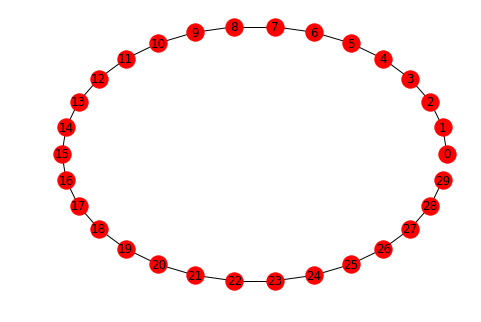

In [22]:
graph = [(0, 1),(1, 2),(2, 3), (3, 4),(4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), 
         (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), 
         (21,22), (22, 23),(23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29)]
draw_graph(graph)

In [45]:
A = np.zeros((30, 30))
for n1, n2 in graph:
    A[n1, n2] += 1
    A[n2, n1] += 1
D = np.eye(30) * np.sum(A, axis=1, keepdims=True)
L = D - A
eigenValues, eigenVectors = np.linalg.eig(L)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [46]:
print('Top 20 eigenvectors')
print(eigenVectors[:20])

Top 20 eigenvectors
[[-1.35130858e-02 -2.69891332e-02  4.03912052e-02  5.36825677e-02
   6.68267901e-02  7.97878449e-02  9.25302067e-02 -1.05018950e-01
  -1.17219843e-01 -1.29099445e-01 -1.40625194e-01 -1.51765500e-01
   1.62489826e-01  1.72768780e-01  1.82574186e-01  1.91879169e-01
   2.00658224e-01  2.08887290e-01 -2.16543810e-01 -2.23606798e-01
   2.30056895e-01  2.35876423e-01  2.41049430e-01  2.45561737e-01
  -2.49400976e-01 -2.52556625e-01  2.55020033e-01 -2.56784449e-01
   2.57845037e-01 -1.82574186e-01]
 [ 4.03912052e-02  7.97878449e-02 -1.17219843e-01 -1.51765500e-01
  -1.82574186e-01 -2.08887290e-01 -2.30056895e-01  2.45561737e-01
   2.55020033e-01  2.58198890e-01  2.55020033e-01  2.45561737e-01
  -2.30056895e-01 -2.08887290e-01 -1.82574186e-01 -1.51765500e-01
  -1.17219843e-01 -7.97878449e-02  4.03912052e-02 -4.82052744e-16
   4.03912052e-02  7.97878449e-02  1.17219843e-01  1.51765500e-01
  -1.82574186e-01 -2.08887290e-01  2.30056895e-01 -2.45561737e-01
   2.55020033e-01 -1.

## 2 Laplacian of a lattice

In [8]:
graph = []
for i in range(900):
    if i + 30 < 900:
        graph.append((i, i+30))
    if (i + 1) % 30 != 0:
        graph.append((i, i+1))

A = np.zeros((900, 900))
for n1, n2 in graph:
    A[n1, n2] += 1
    A[n2, n1] += 1
D = np.eye(900) * np.sum(A, axis=1, keepdims=True)
L = D - A
eigenValues, eigenVectors = np.linalg.eig(L)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [9]:
print('Top 30 eigenvectors')
print(eigenVectors[:30])

Top 30 eigenvectors
[[ 1.82603488e-04 -5.15772839e-04  4.69895307e-07 ... -9.05653710e-03
  -6.65753023e-02 -3.33333333e-02]
 [-5.45809821e-04  1.53322219e-03  7.04856948e-06 ... -9.36824064e-03
  -6.62105958e-02 -3.33333333e-02]
 [ 9.03036148e-04 -2.50890608e-03 -3.94796887e-05 ... -9.98823263e-03
  -6.54851787e-02 -3.33333333e-02]
 ...
 [-9.03036148e-04  4.17654472e-05  2.50886699e-03 ... -6.50247296e-02
  -1.09012362e-03 -3.33333333e-02]
 [ 5.45809821e-04 -8.44541643e-06 -1.53321385e-03 ... -6.56447216e-02
  -3.64706472e-04 -3.33333333e-02]
 [-1.82603488e-04 -5.42107981e-17  5.15772625e-04 ... -6.59564251e-02
   7.60491324e-14 -3.33333333e-02]]


## 3 Approximation of an image by laplacian bases

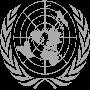

In [3]:
#img_size = 150
img_size = 90 # 150 * 150 runs to slow in my computer
img = Image.open('Emblem_of_the_United_Nations.png')
img = img.resize((img_size, img_size)).convert('L')
display(img)

In [4]:
im = np.asarray(img)

graph = []
for i in range(img_size*img_size):
    if i + img_size < img_size*img_size:
        graph.append((i, i+img_size))
    if (i + 1) % img_size != 0:
        graph.append((i, i+1))

A = np.zeros((img_size*img_size, img_size*img_size))
for n1, n2 in graph:
    A[n1, n2] += 1
    A[n2, n1] += 1
D = np.eye(img_size*img_size) * np.sum(A, axis=1, keepdims=True)
L = D - A
eigenValues, eigenVectors = np.linalg.eig(L)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

v = eigenVectors [:, :30]
reconstruct = np.matmul(np.matmul(im.reshape(1,-1), v), v.T).reshape(img_size, img_size)

/home/fanjin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


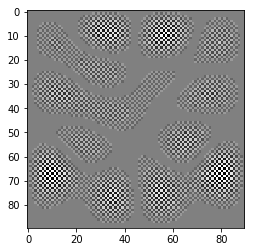

In [5]:
plt.imshow(reconstruct.astype(np.int), cmap='gray')
plt.show()